# Data

In [3]:
import datapane as dp

new_profile = dp.Blob.get(name='github_data', owner='khuyentran1401').download_df()

# Matplotlib

## Pros

<BarContainer object of 100 artists>

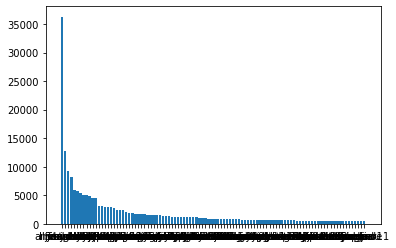

In [4]:
import matplotlib.pyplot as plt

top_followers = new_profile.sort_values(by='followers', axis=0, ascending=False)[:100]

fig = plt.figure()

plt.bar(top_followers.user_name,
       top_followers.followers)

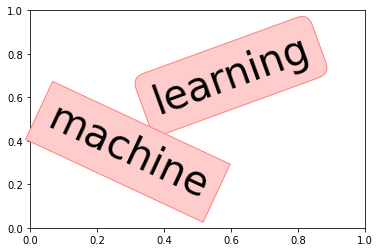

In [5]:
fig = plt.figure()

plt.text(0.6, 0.7, "learning", size=40, rotation=20.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(0.55, 0.6, "machine", size=40, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.show()

## Cons

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

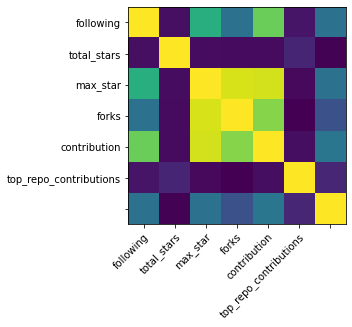

In [6]:
correlation = new_profile.corr()

fig, ax = plt.subplots()
im = plt.imshow(correlation)

ax.set_xticklabels(correlation.columns)
ax.set_yticklabels(correlation.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Seaborn

## Pros

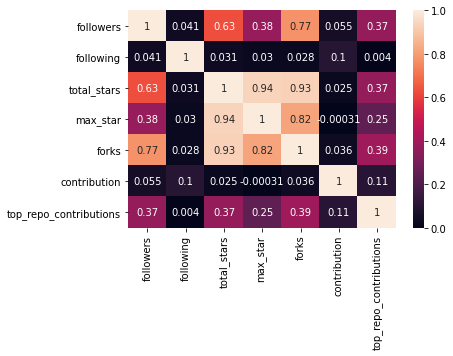

In [8]:
import seaborn as sns 

correlation = new_profile.corr()

sns.heatmap(correlation, annot=True)

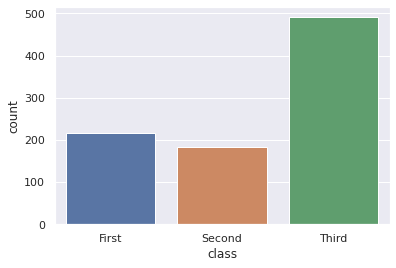

In [9]:
sns.set(style="darkgrid")

titanic = sns.load_dataset("titanic")

ax = sns.countplot(x="class", data=titanic)

# Plotly

In [11]:
import plotly.express as px 

fig = px.scatter(new_profile[:100],
          x='followers',
          y='total_stars',
          color='forks',
          size='contribution')
fig.show()

In [12]:
top_followers = new_profile.sort_values(by='followers', axis=0, ascending=False)[:100]

fig = px.bar(top_followers, 
             x='user_name', 
             y='followers',
            )

fig.show()

In [14]:
location_df = dp.Blob.get(name='location_df', owner='khuyentran1401').download_df()

m = px.scatter_geo(location_df, lat='latitude', lon='longitude',
                 color='total_stars', size='forks',
                 hover_data=['user_name','followers'],
                 title='Locations of Top Users')

m.show()

# Altair

In [15]:
import seaborn as sns
import altair as alt 

titanic = sns.load_dataset("titanic")

alt.Chart(titanic).mark_bar().encode(
    alt.X('class'),
    y='count()'
)

alt.Chart(...)

In [16]:
hireable = alt.Chart(titanic).mark_bar().encode(
    x='sex:N',
    y='mean_age:Q'
).transform_aggregate(
    mean_age='mean(age)',
    groupby=['sex'])

hireable

alt.Chart(...)

In [17]:
brush = alt.selection(type='interval')

points = alt.Chart(titanic).mark_point().encode(
    x='age:Q',
    y='fare:Q',
    color=alt.condition(brush, 'class:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(titanic).mark_bar().encode(
    y='class:N',
    color='class:N',
    x = 'count(class):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

# Bokeh

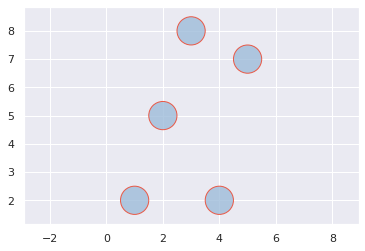

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = [1, 2, 3, 4, 5]
y = [2, 5, 8, 2, 7]

for x,y in zip(x,y): 
    ax.add_patch(plt.Circle((x, y), 0.5, edgecolor = "#f03b20",facecolor='#9ebcda', alpha=0.8))


#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.set_xbound(3, 4)

ax.plot()   #Causes an autoscale update.
plt.show()


In [21]:
from bokeh.io import output_file, show, output_notebook, reset_output
from bokeh.models import Circle
from bokeh.plotting import figure

output_notebook()
reset_output()


plot = figure(plot_width=400, plot_height=400, tools="tap", title="Select a circle")
renderer = plot.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=50)

selected_circle = Circle(fill_alpha=1, fill_color="firebrick", line_color=None)
nonselected_circle = Circle(fill_alpha=0.2, fill_color="blue", line_color="firebrick")

renderer.selection_glyph = selected_circle
renderer.nonselection_glyph = nonselected_circle

show(plot)

Loading BokehJS ...

In [22]:
from bokeh.layouts import gridplot, row
from bokeh.models import ColumnDataSource

reset_output()
output_notebook()

source = ColumnDataSource(new_profile)

TOOLS = "box_select,lasso_select,help"
TOOLTIPS = [('user', '@user_name'),
            ('followers', '@followers'),
            ('following', '@following'),
            ('forks', '@forks'), 
            ('contribution', '@contribution')]

s1 = figure(tooltips=TOOLTIPS, plot_width=300, plot_height=300, title=None, tools=TOOLS)
s1.circle(x='followers', y='following', source=source)

s2 = figure(tooltips=TOOLTIPS, plot_width=300, plot_height=300, title=None, tools=TOOLS)
s2.circle(x='followers', y='forks', source=source)

s3 = figure(tooltips=TOOLTIPS, plot_width=300, plot_height=300, title=None, tools=TOOLS)
s3.circle(x='followers', y='contribution', source=source)

p = gridplot([[s1,s2,s3]])
show(p)

Loading BokehJS ...

In [27]:
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

titanic_groupby = titanic.groupby('class').sum().reset_index()

p = figure(x_range=list(titanic_groupby['class']))
p.vbar(x='class', top='survived', source = titanic_groupby,
      fill_color=factor_cmap('class', palette=Spectral6, factors=list(titanic_groupby['class'])
      ))
show(p)

In [28]:
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

p = figure(x_range=list(titanic_groupby['class']))
p.vbar(x='class', top='survived', width=0.9, source = titanic_groupby,
      fill_color=factor_cmap('class', palette=Spectral6, factors=list(titanic_groupby['class'])
      ))
show(p)

# Folium

In [29]:
import folium

# Load data
location_df = dp.Blob.get(name='location_df', owner='khuyentran1401').download_df() 

# Save latitudes, longitudes, and locations' names in a list
lats = location_df['latitude']
lons = location_df['longitude']
names = location_df['location']

# Create a map with an initial location
m = folium.Map(location=[lats[0], lons[0]])

for lat, lon, name in zip(lats, lons, names):
  
    # Create marker with other locations
    folium.Marker(location=[lat, lon],
                  popup= name, 
                 icon=folium.Icon(color='green')
).add_to(m)
    
m

In [30]:
# Enable adding more locations in the map
m = m.add_child(folium.ClickForMarker(popup='Potential Location'))

In [31]:
# heatmap

from folium.plugins import HeatMap

m = folium.Map(location=[lats[0], lons[0]])

HeatMap(data=location_df[['latitude', 'longitude', 'total_stars']]).add_to(m)

In [32]:
m 